# Implemrntation of k-nearest neighbor algorithm from scratch and applied to Boston dataset fron Sk-learn

In [1]:
# built in datasets and other required functions are imported from 
# sklearn 
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

In [2]:
#Loading the Boston dataset
boston=datasets.load_boston()
x=boston.data[:,:]
y=boston.target
print(x.shape,y.shape)

(506, 13) (506,)


In [3]:
tsize=0.30 #30% of total data is used for testing and 70% used for training
## splitting the dataset into training and testing sets,
# (parameter random state is fixed at some integer, to ensure the 
# same train and test sets across various runs)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=tsize,random_state=102)

In [4]:
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(354, 13) (354,)
(152, 13) (152,)


In [5]:
##function to find Euclidean distance
def edist(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))
##function to predict values using knn for given test data tx
def knn_reg(tr_x, tr_y, tx , k):
   
    distances = []
    
    #Find distances between new data and all the training data
    for i in range(tr_x.shape[0]):
        distances.append(edist(tr_x[i], tx))
    
    #sort the distances in ascending order
    distances = np.array(distances)
    inds = np.argsort(distances)
    
    distances = distances[inds]
    tr_y_sorted = tr_y[inds] #sorted values of target variable
    
    #predicted value is the average of first k values of target
    #vector
    value = np.average(tr_y_sorted[:k])
    return value

In [6]:
##Function to find mean squared error for the entire test dataset
def knn_mse(tr_x , tr_y, test_x , test_y , k):
    preds = []
    for i in range(test_x.shape[0]):
        value = knn_reg(tr_x, tr_y, test_x[i] , k)
        preds.append(value)
    
    preds  = np.array(preds)
    err = mean_squared_error(test_y , preds)
    return err

In [7]:
##Finding MSEs for different values of k 
maxk=int(math.sqrt(xtrain.shape[0])) #maximum value of k 
mse_val = [] #to store rmse values for different k
for k in range(1,maxk):
    error= knn_mse(xtrain , ytrain , xtest , ytest ,k)
    mse_val.append(error) #store rmse values
    print('MSE value for k= ' , k , 'is:', round(error,3))

MSE value for k=  1 is: 52.07
MSE value for k=  2 is: 41.057
MSE value for k=  3 is: 42.389
MSE value for k=  4 is: 44.167
MSE value for k=  5 is: 40.997
MSE value for k=  6 is: 39.929
MSE value for k=  7 is: 40.512
MSE value for k=  8 is: 38.973
MSE value for k=  9 is: 38.557
MSE value for k=  10 is: 38.854
MSE value for k=  11 is: 38.988
MSE value for k=  12 is: 40.509
MSE value for k=  13 is: 41.166
MSE value for k=  14 is: 43.07
MSE value for k=  15 is: 44.868
MSE value for k=  16 is: 46.468
MSE value for k=  17 is: 47.821


In [8]:
a = min(mse_val)
print("The minimum value of mse is: ", a)
ke = mse_val.index(a) + 1
print("When k is: ", ke)

The minimum value of mse is:  38.55725064977258
Wheb k is:  9


Best Value of k using elbow curve is  9


Text(9, 38.55725064977258, '   elbow point')

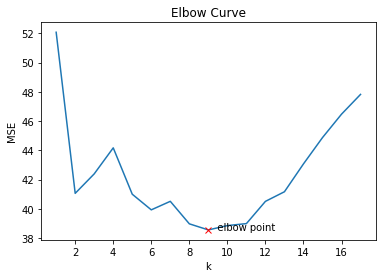

In [9]:
##plotting the elbow curve 
k=np.arange(1,maxk)
xl="k"
yl="MSE"
plt.xlabel(xl) 
plt.ylabel(yl)
plt.title("Elbow Curve")
plt.plot(k,mse_val)
##finding the k for the elbow point 
# ke=find_elbow()
print("Best Value of k using elbow curve is ",ke)
plt.plot(ke,mse_val[ke-1],'rx')
plt.annotate("   elbow point", (ke,mse_val[ke-1]))